In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import graphviz
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

In [ ]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

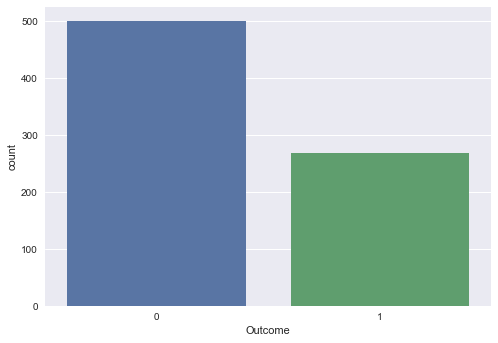

In [ ]:
sns.countplot(y)

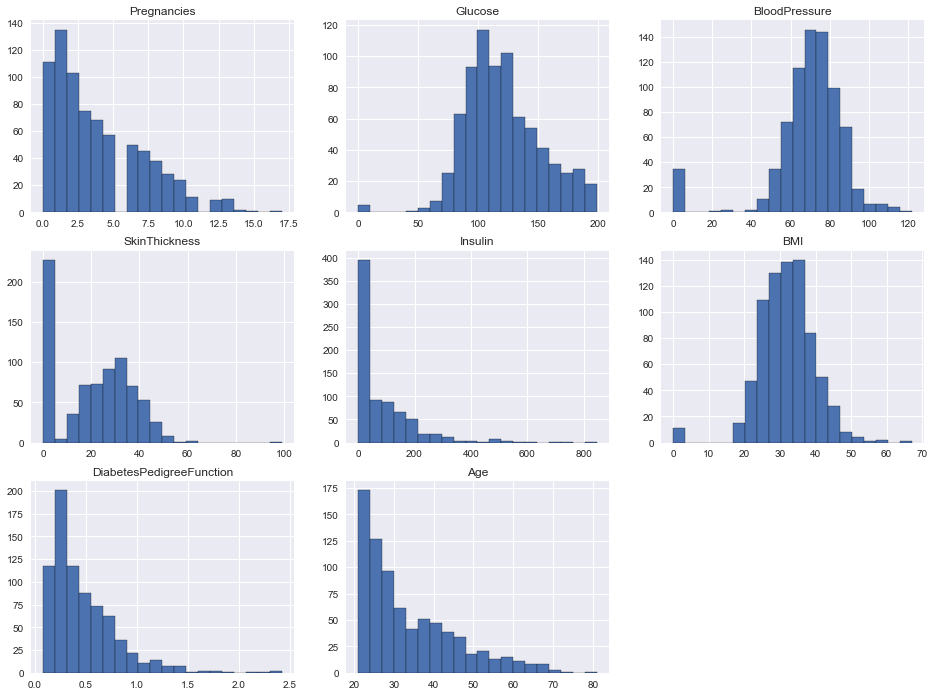

In [ ]:
feature = X.columns
n_feature = X.shape[1]
plt.subplots(figsize=(16,12))
for i,j in zip(feature, range(n_feature)):
    plt.subplot(3,3,j+1)
    diabetes[i].hist(bins=20, edgecolor='black')
    plt.title(i)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


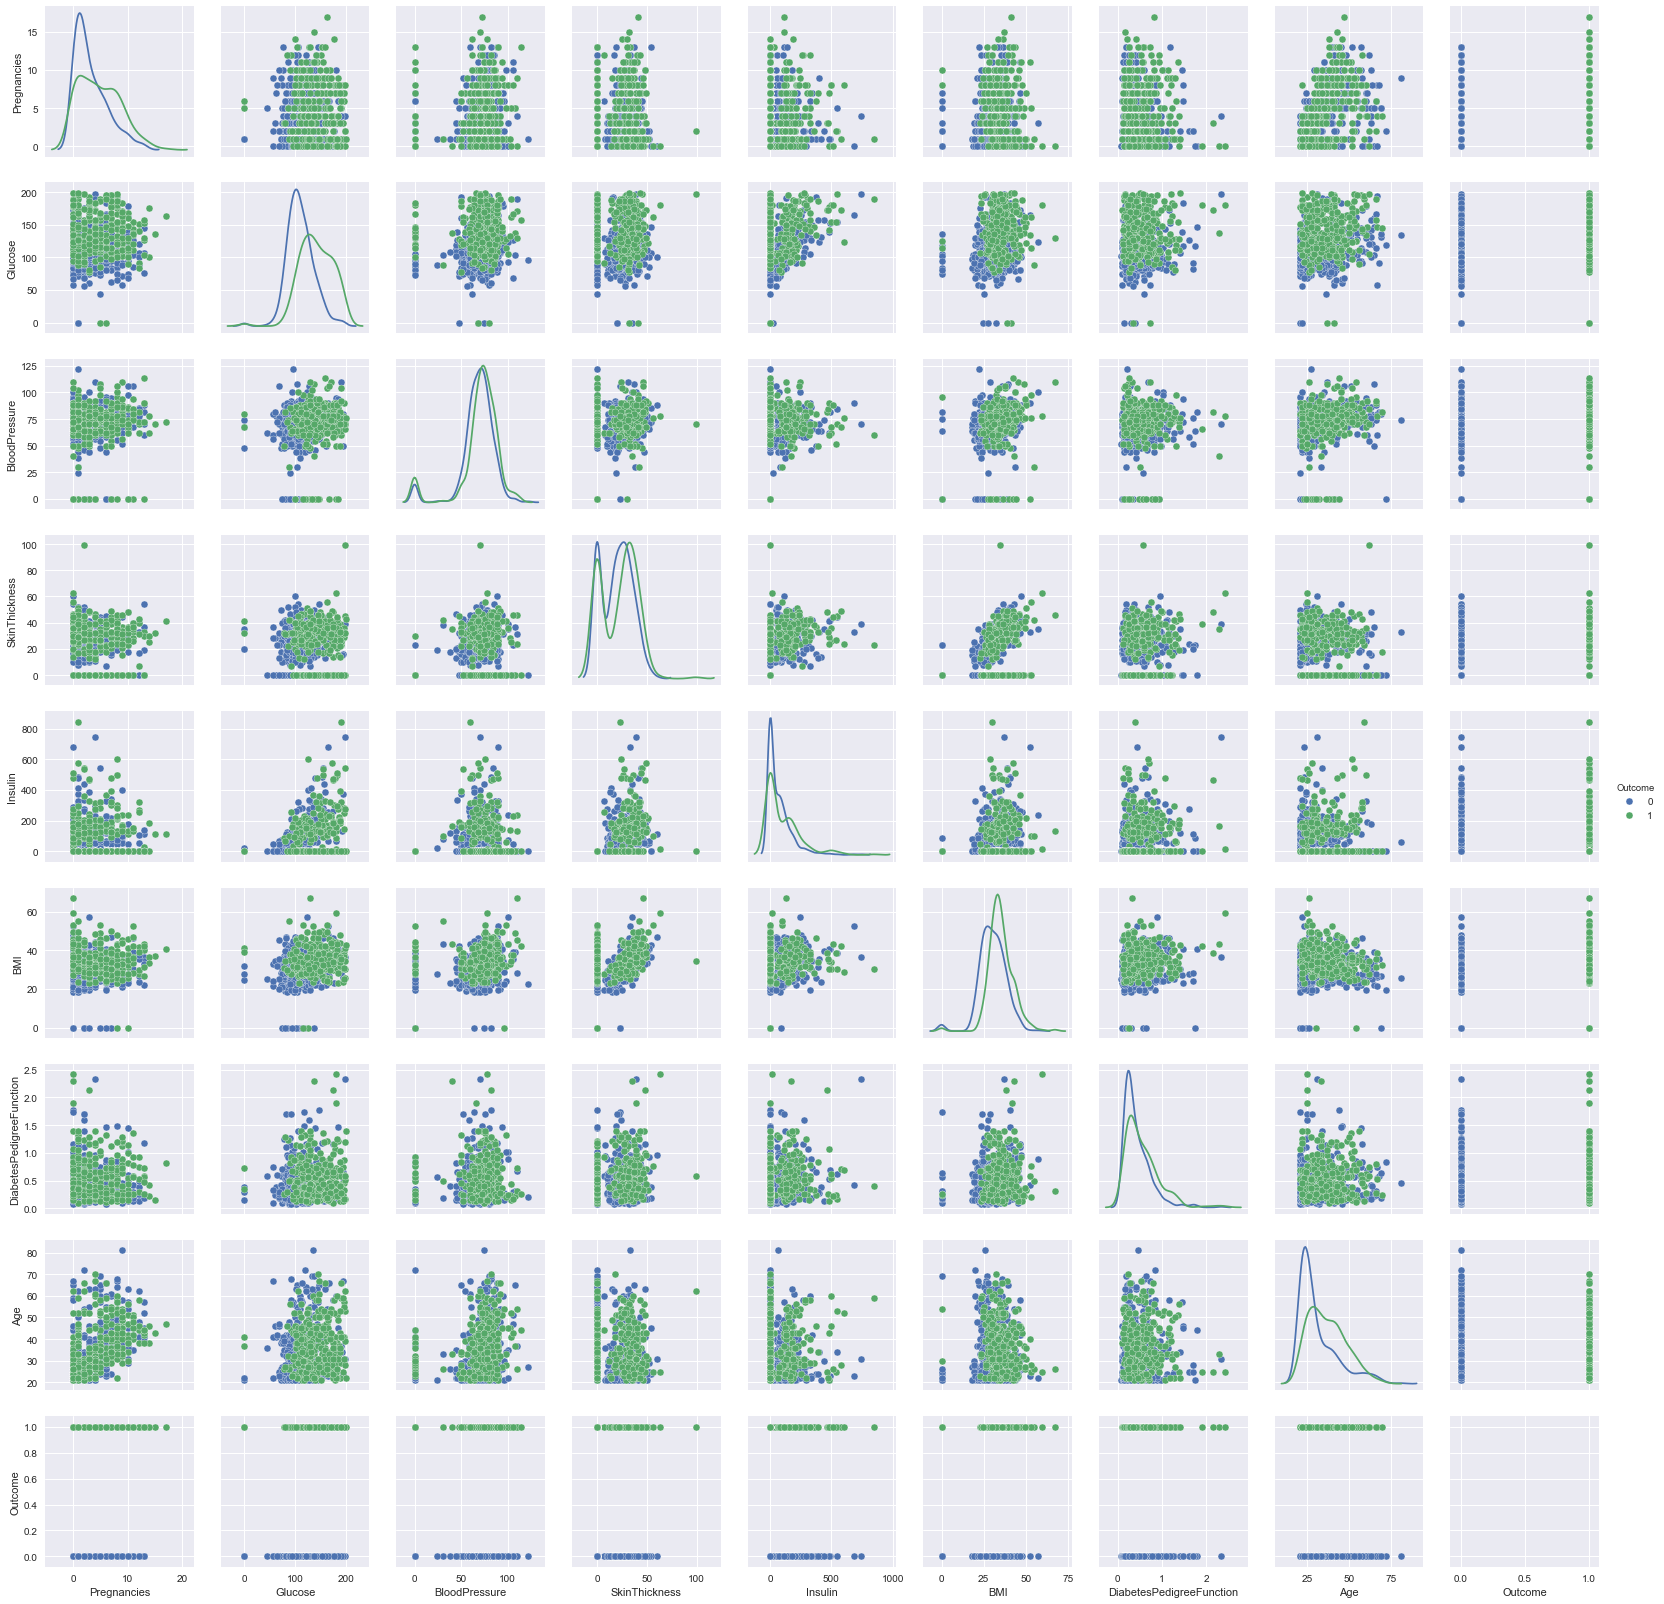

In [ ]:
sns.pairplot(diabetes, hue='Outcome', diag_kind='kde')

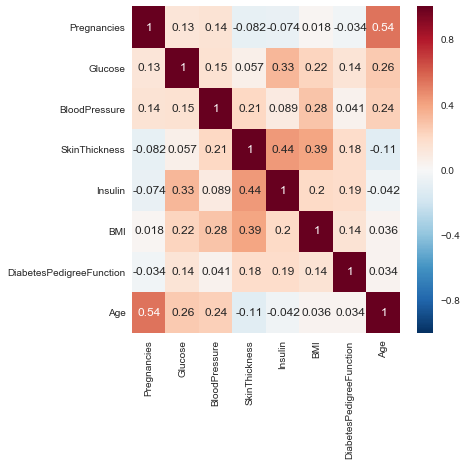

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(X.corr(), annot=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print('#1 tree')
print('Accurancy on training set:{:.3f}'.format(tree.score(X_train, y_train)))
print('Accurancy on testing set:{:.3f}'.format(tree.score(X_test, y_test)))

#1 tree
Accurancy on training set:1.000
Accurancy on testing set:0.745


In [ ]:
pruned_tree = DecisionTreeClassifier(max_depth=4)
pruned_tree.fit(X_train, y_train)
print('#2 pruned tree')
print('Accurancy on training set:{:.3f}'.format(pruned_tree.score(X_train, y_train)))
print('Accurancy on testing set:{:.3f}'.format(pruned_tree.score(X_test, y_test)))

#2 pruned tree
Accurancy on training set:0.804
Accurancy on testing set:0.740


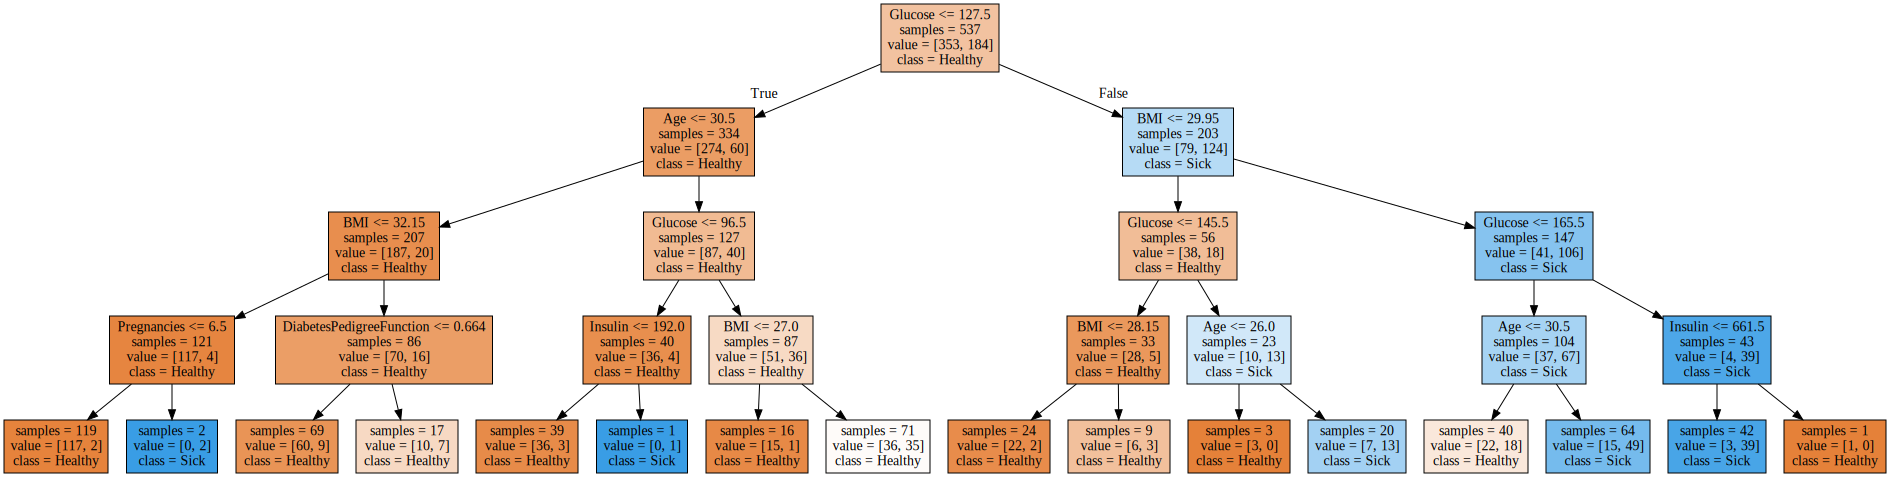

In [ ]:
export_graphviz(pruned_tree, out_file='tree.dot', class_names=['Healthy', 'Sick'], feature_names=X.columns, impurity=False, filled=True)
with open('tree.dot') as f:
    graph = f.read()
graphviz.Source(graph)

In [ ]:
def plot_importance(model):
    plt.barh(range(n_feature), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feature), X.columns)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')

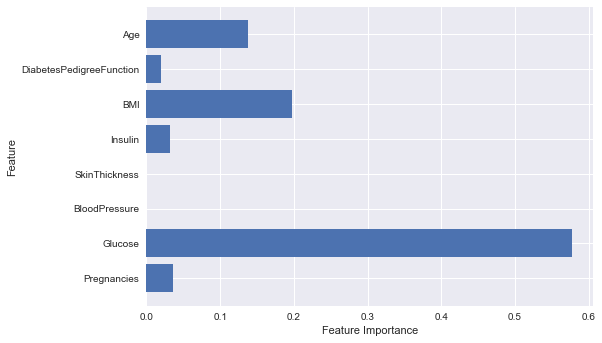

In [ ]:
plot_importance(pruned_tree)

In [ ]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=7)
forest.fit(X_train, y_train)
print('#3 random forest')
print('Accurancy on training set:{:.3f}'.format(forest.score(X_train, y_train)))
print('Accurancy on testing set:{:.3f}'.format(forest.score(X_test, y_test)))

#3 random forest
Accurancy on training set:0.888
Accurancy on testing set:0.758


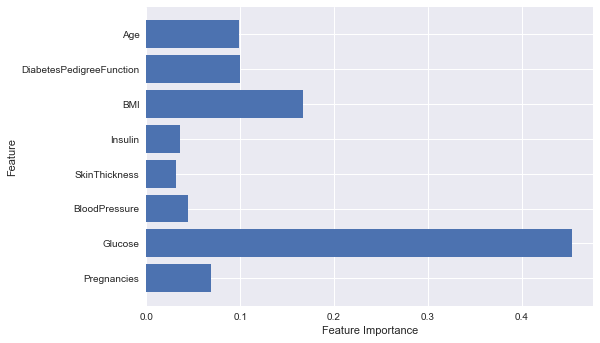

In [ ]:
plot_importance(forest)

In [ ]:
gradient_tree = GradientBoostingClassifier(learning_rate=0.02, n_estimators=100, max_features=7)
gradient_tree.fit(X_train, y_train)
print('#4 Gradient Boosting')
print('Accurancy on training set:{:.3f}'.format(gradient_tree.score(X_train, y_train)))
print('Accurancy on testing set:{:.3f}'.format(gradient_tree.score(X_test, y_test)))

#4 Gradient Boosting
Accurancy on training set:0.838
Accurancy on testing set:0.753


In [ ]:
data1 = []
data2 = []
for model in [tree, pruned_tree, forest, gradient_tree]:
    data1.append(model.score(X_train, y_train))
    data2.append(model.score(X_test, y_test))
data = {'Accurancy(Training)':data1, 'Accurancy(Testing)':data2}
df = pd.DataFrame(data, index=['Tree', 'Pruned Tree', 'Random Forest','Gradient Boosting'])
df

,Accurancy(Testing),Accurancy(Training)
Tree,0.744589,1.000000
Pruned Tree,0.740260,0.804469
Random Forest,0.757576,0.888268
Gradient Boosting,0.753247,0.837989


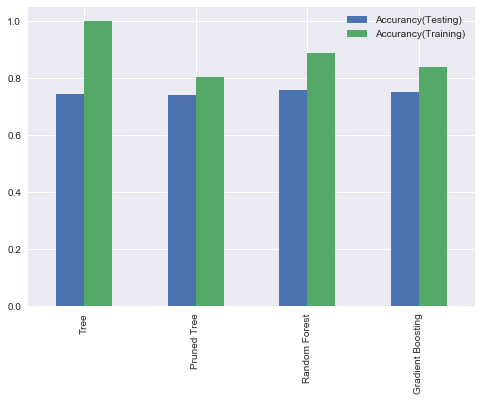

In [ ]:
plt.figure(figsize=(20,16))
df.plot.bar()